###Topic: Challenge Set 5
###Subject: Basic Regression
###Date: 01/28/2018
###Name: Subramanian Iyer
####Worked with: Worked individually

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import patsy
from copy import deepcopy
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('2013_movies.csv')

###**Challenge 1**

In [13]:
df['Constant'] = [1] * len(df)

                             Title       Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000.0           424668047   
1                       Iron Man 3  200000000.0           409013994   
2                           Frozen  150000000.0           400738009   
3                  Despicable Me 2   76000000.0           368061265   
4                     Man of Steel  225000000.0           291045518   

                    Director Rating  Runtime          ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00  
1                Shane Black  PG-13      129  2013-05-03 00:00:00  
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00  
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00  


Text(0.5,1,'Predictions vs Actual')

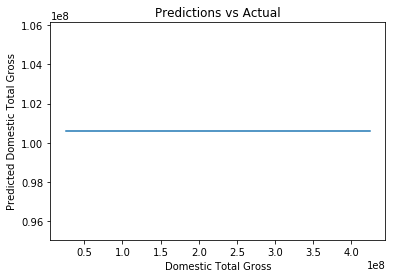

In [16]:
lr1 = LinearRegression()
X = df[['Constant']]
y = df['DomesticTotalGross']
lr1.fit(X, y)
#This model will predict the mean every time.  You can interpret this by saying "that's the mean."
preds = lr1.predict(X)
plt.plot(df['DomesticTotalGross'], preds)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Predictions vs Actual')

Text(0,0.5,'Frequency')

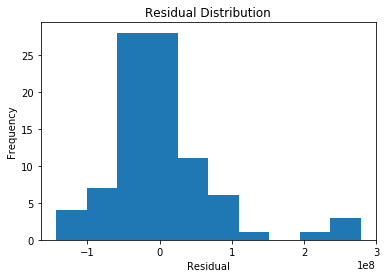

In [31]:
plt.hist(df.DomesticTotalGross - preds)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
#Residual distribution is skewed.

###**Challenge 2**

Text(0.5,1,'Predictions vs Actual')

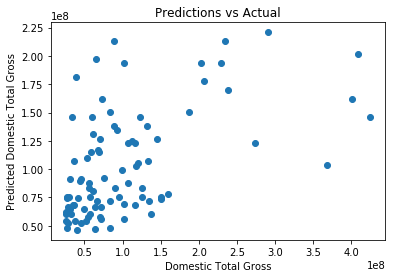

In [29]:
lr2 = LinearRegression()
df = df[np.invert(np.isnan(df.Budget))]
lr2.fit(df[['Budget']], df['DomesticTotalGross'])
preds = lr2.predict(df[['Budget']])
plt.scatter(df['DomesticTotalGross'], preds)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Predictions vs Actual')

Text(0,0.5,'Frequency')

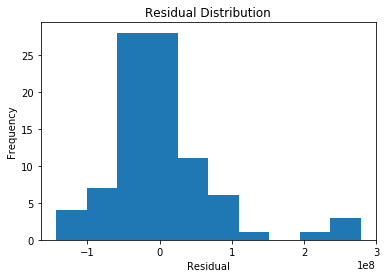

In [32]:
plt.hist(df.DomesticTotalGross - preds)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

Text(0.5,1,'Predictions vs budget')

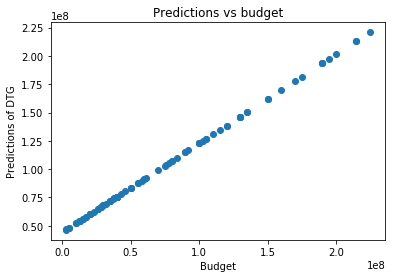

In [33]:
plt.scatter(df['Budget'], preds)
plt.ylabel('Predictions of DTG')
plt.xlabel('Budget')
plt.title('Predictions vs budget')

Text(0.5,1,'Residuals vs Budget')

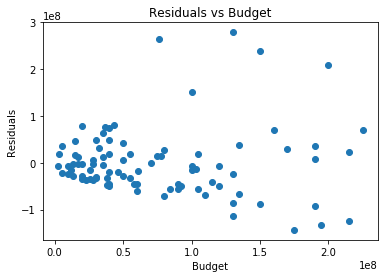

In [34]:
plt.scatter(df['Budget'],df['DomesticTotalGross']-preds)
plt.ylabel('Residuals')
plt.xlabel('Budget')
plt.title('Residuals vs Budget')
##This is a linear model of one feature, so all the predictions are in one line.  Looking at the residuals, we see
##there's a higher variance in gross among higher budget movies.

###**Challenge 3**

Text(0.5,1,'Predictions vs Actual')

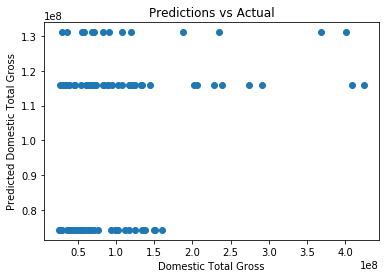

In [41]:
X=patsy.dmatrix('Rating',data=df,return_type='dataframe')
lr3 = LinearRegression()
lr3.fit(X, df['DomesticTotalGross'])
preds = lr3.predict(X)
plt.scatter(df['DomesticTotalGross'], preds)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Predictions vs Actual')

Text(0,0.5,'Frequency')

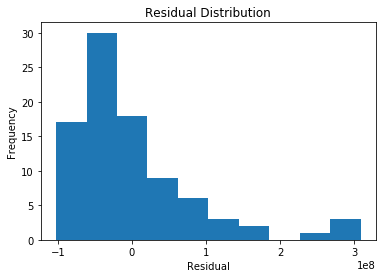

In [42]:
#This model is simply predicting the mean for each rating
plt.hist(df.DomesticTotalGross - preds)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

###**Challe

Text(0.5,1,'Predictions vs Actual')

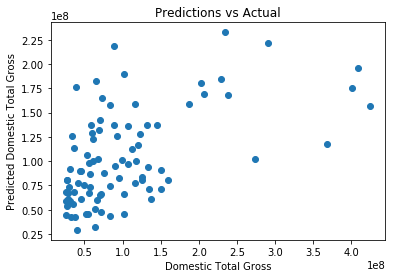

In [44]:
df1 = df.join(X)
del df1['Rating']
del df1['Director']
del df1['Title']
del df1['ReleaseDate']
Y = deepcopy(df1['DomesticTotalGross'])
del df1['DomesticTotalGross']
lr4 = LinearRegression()
lr4.fit(df1, Y)
preds = lr4.predict(df1)
plt.scatter(df['DomesticTotalGross'], preds)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Predictions vs Actual')

Text(0,0.5,'Frequency')

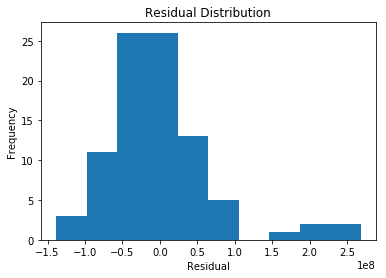

In [45]:
#Decent.  Again, higher variance on the right, but that's just how the data is. Residuals look normal
#if you ignore the outliers on the right.
plt.hist(df.DomesticTotalGross - preds)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

Text(0.5,1,'Predictions vs Actual')

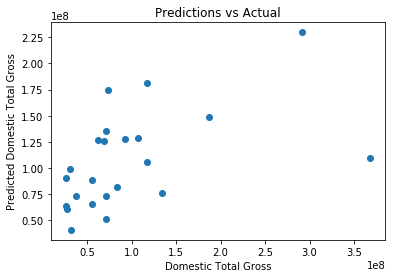

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df1, Y, random_state = 4444)
lr5 = LinearRegression()
lr5.fit(X_train, y_train)
preds = lr5.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Predictions vs Actual')

Text(0,0.5,'Frequency')

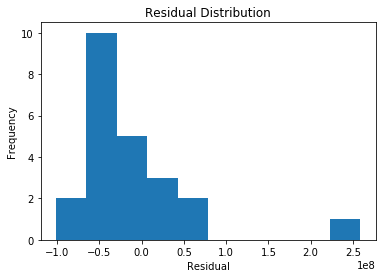

In [53]:
plt.hist(y_test - preds)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')

In [ ]:
##Nothing special and much different to report.